In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
from openpyxl import load_workbook
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#pip install openpyxl

In [4]:
proj          = 'SN3'
cover         = ['CE', 'CQ']

fresh_clean   = ['HC', 'HF', 'JP']
str_ore       = ['HC', 'HF']
ore_rocks     = ['CE', 'HC', 'HF', 'HMN']
basin_rocks   = ['JP', 'HF', 'HC', 'HMN']
mineralized   = ['CE', 'HC', 'HF', 'HMN', 'FMN', 'JP']
waste         = ['CQ', 'MD', 'MS', 'MSD', 'BR']

model_rocks = ['CE', 'HC', 'HF', 'HMN', 'FMN', 'JP', 'CQ', 'MD', 'MSD', 'MS', 'BR' ]

teores_gl     = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL']
faixas        = ['g1', 'g1a', 'g1b', 'g2', 'g3']
param_event   = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL', 'G1', 'G1A', 'G1B', 'G2', 'G3']

not_countable = ['FURO','NA','DE','ATE','CLV','CLM','FLX_AN','FLX_AN_OR','DA_ANA','DA_SAM','d_agru','tipo_am','global','mass_t','status']

gran_batch = ['G1A', 'G1B', 'G2', 'G3']

set_g1a = ['G1A','FE1A', 'SI1A', 'P1A', 'AL1A', 'MN1A', 'PF1A', 'TI1A', 'MG1A', 'CA1A']
set_g1b = ['G1B','FE1B', 'SI1B', 'P1B', 'AL1B', 'MN1B','PF1B', 'TI1B', 'MG1B', 'CA1B']
set_g2 = ['G2','FE2', 'SI2', 'P2', 'AL2','MN2', 'PF2', 'TI2', 'MG2', 'CA2']
set_g3 = ['G3','FE3', 'SI3', 'P3', 'AL3', 'MN3','PF3', 'TI3', 'MG3', 'CA3']

litocolor=dict(AG= "#FFEEBB",AT= "#777777",CE= "#00AA00",CH= "#FFFF00",CQ= "#77FFBB", \
               FMN= "#7766DD",HC= "#EE0000",HF= "#EE00DD",HMN= "#995555",JP= "#004488", \
               LT= "#99BB99",MD= "#CC8800",MS= "#99BB99",MSD= "#DDCC77",QT= "#776655", \
               SO= "#336611",SR= "#FFFFFF",XI= "#CC8800", BR= "#BB133E")


valecolor= dict(VERDE='#007E7A',LARANJA='#ECB11F',CINZA='#6F7070',BRANCO='#FFFFFF', \
                LARANJA2='#E37222',VERMELHO='#BB133E',AZUL='#3D7EDB',AZUL2='#00B0CA', \
                VERDE2='#69BE28',AMARELO='#DFDF00')

chart_size= [10,10]




## DIRETÓRIOS

In [5]:
#CRIA ENDEREÇO NO CASO DE NÃO EXISTIR
if not os.path.exists('000_anulados'):
    os.mkdir('000_anulados')
if not os.path.exists('000_backup'):
    os.mkdir('000_backup')

## LISTAS

In [6]:
proj = 'SN3'

waste = [ 'MD', 'MS', 'MSD', 'BR']

GL=['FEGL','SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL']

faixa = ['GL', '1', '1A', '1B', '2', '2A', '2B', '3']

var6_quim =['FE', 'SI', 'P', 'AL', 'MN', 'PF']

var3_quim = ['TI', 'MG', 'CA']


## LOAD DATA

In [7]:
fso = pd.read_csv('sn3flp_fso_assay.csv', low_memory=False, na_values='-99', encoding="latin1")

In [8]:
fso.shape

(3091, 99)

In [9]:
fso.head(10)

,furo,na,de,ate,length,clv,clm,cli,fegl,sigl,pgl,algl,mngl,pfgl,tigl,mggl,cagl,g1,g1a,g1b,g2,g2a,g2b,g3,fe1,si1,p1,al1,mn1,pf1,ti1,mg1,ca1,fe1a,si1a,p1a,al1a,mn1a,pf1a,ti1a,mg1a,ca1a,fe1b,si1b,p1b,al1b,mn1b,pf1b,ti1b,mg1b,ca1b,fe2,si2,p2,al2,mn2,pf2,ti2,mg2,ca2,fe2a,si2a,p2a,al2a,mn2a,pf2a,ti2a,mg2a,ca2a,fe2b,si2b,p2b,al2b,mn2b,pf2b,ti2b,mg2b,ca2b,fe3,si3,p3,al3,mn3,pf3,ti3,mg3,ca3,fqgl,fq1,fq1a,fq1b,fq2,fq2a,fq2b,fq3,fgra,rec,fluxo,flag_qaqc
0,N3-0001,N3-0001-001,0.00,0.60,0.60,CG,vazio,CE,63.1,0.8,0.18,1.2,0.06,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN
1,N3-0001,N3-0001-NR-001,0.60,1.20,0.60,SR,vazio,SR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NR_NS,NaN
2,N3-0001,N3-0001-002,1.20,1.60,0.40,CG,vazio,CE,66.7,0.4,0.13,0.8,0.05,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN
3,N3-0001,N3-0001-003,1.60,4.79,3.19,CM,vazio,CE,65.4,0.5,0.08,2.4,0.06,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN
4,N3-0001,N3-0001-004,4.79,7.20,2.41,CM,vazio,CE,65.6,0.6,0.08,2.0,0.06,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN
5,N3-0001,N3-0001-005,7.20,10.28,3.08,CM,vazio,CE,66.8,0.3,0.08,1.0,0.08,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN
6,N3-0001,N3-0001-006,10.28,13.46,3.18,CM,vazio,CE,65.4,0.3,0.11,1.5,0.06,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN
7,N3-0001,N3-0001-007,13.46,16.66,3.20,CM,vazio,CE,65.3,0.3,0.15,1.4,0.04,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN
8,N3-0001,N3-0001-008,16.66,20.45,3.79,CM,vazio,CE,66.4,0.3,0.13,1.3,0.06,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
fso.rename(columns=str.upper, inplace=True)
fso.head(5)

,FURO,NA,DE,ATE,LENGTH,CLV,CLM,CLI,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,G1,G1A,G1B,G2,G2A,G2B,G3,FE1,SI1,P1,AL1,MN1,PF1,TI1,MG1,CA1,FE1A,SI1A,P1A,AL1A,MN1A,PF1A,TI1A,MG1A,CA1A,FE1B,SI1B,P1B,AL1B,MN1B,PF1B,TI1B,MG1B,CA1B,FE2,SI2,P2,AL2,MN2,PF2,TI2,MG2,CA2,FE2A,SI2A,P2A,AL2A,MN2A,PF2A,TI2A,MG2A,CA2A,FE2B,SI2B,P2B,AL2B,MN2B,PF2B,TI2B,MG2B,CA2B,FE3,SI3,P3,AL3,MN3,PF3,TI3,MG3,CA3,FQGL,FQ1,FQ1A,FQ1B,FQ2,FQ2A,FQ2B,FQ3,FGRA,REC,FLUXO,FLAG_QAQC
0,N3-0001,N3-0001-001,0.00,0.60,0.60,CG,vazio,CE,63.1,0.8,0.18,1.2,0.06,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN
1,N3-0001,N3-0001-NR-001,0.60,1.20,0.60,SR,vazio,SR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NR_NS,NaN
2,N3-0001,N3-0001-002,1.20,1.60,0.40,CG,vazio,CE,66.7,0.4,0.13,0.8,0.05,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN
3,N3-0001,N3-0001-003,1.60,4.79,3.19,CM,vazio,CE,65.4,0.5,0.08,2.4,0.06,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN
4,N3-0001,N3-0001-004,4.79,7.20,2.41,CM,vazio,CE,65.6,0.6,0.08,2.0,0.06,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN


In [244]:
#criando planilha sequencial com sumario

In [245]:
summary=pd.DataFrame()


## FUNCTIONS

In [246]:
#função para adicionar dataframe sumario ao arquivo prepara fac
def update_summary():
    
    book = load_workbook(proj + '_PREPARA_FAC.xlsx')
    
    writer = pd.ExcelWriter(proj+ "_PREPARA_FAC.xlsx", engine="openpyxl", mode='a', if_sheet_exists='replace')
    writer.book = book
    summary.to_excel(writer, sheet_name='PROCEDIMENTOS')
    writer.save()
    writer.close()
    

In [247]:
summary

""


In [248]:
def add_to_fac(df, sheetname):
    
    book = load_workbook(proj + '_PREPARA_FAC.xlsx')    
    writer = pd.ExcelWriter(proj+ "_PREPARA_FAC.xlsx", engine="openpyxl", mode='a', if_sheet_exists='replace')
    #writer = pd.ExcelWriter(proj+ "_PREPARA_FAC.xlsx", engine="xlsxwriter")
    writer.book = book
    df.to_excel(writer, sheet_name = sheetname )
    writer.save()
    writer.close()

In [249]:
#função para adicionar sequencia de procedimentos a uma tabela de sumario
def add_to_summary(df1, df2, sheet_name, desc, obs, dfsummary):    
    
    data=pd.DataFrame({'SHEET':[sheet_name],
                       'DESC': [desc],
                       'NSAMP_INICIAL':[df1.LENGTH.count()],
                       'NSAMP_FINAL':[df2.LENGTH.count()],
                       'DIFF_N':[df2.LENGTH.count() - df1.LENGTH.count()],
                       'DIFF_N_PERC':[(df2.LENGTH.count()-df1.LENGTH.count())/df1.LENGTH.count()],
                       'METRAGEM_INICIAL':df1.LENGTH.sum(),
                       'METRAGEM_FINAL':df2.LENGTH.sum(),
                       'DIFF_M':df2.LENGTH.sum() - df1.LENGTH.sum(),
                       'DIFF_M_PERC': (df2.LENGTH.sum() - df1.LENGTH.sum())/df1.LENGTH.sum(),
                       'OBS':[obs]
                      })
    dfsummary=dfsummary.append(data, ignore_index=True)
    return dfsummary

In [250]:
def cleanup_gl_grq(df, df_subset):
    
    df.loc[df_subset,'FGRA'] = np.nan
    for fx in faixa:
        df.loc[df_subset,'FQ' + fx] = np.nan
        df.loc[df_subset,'G' + fx] = np.nan
        for v in var6_quim + var3_quim:
            df.loc[df_subset, v + fx] = np.nan
    return df

In [251]:
#recebe um dataframe, uma faixa onde há resíduos, uma faixa vizinha para receber o resíduo,
#torna a faixa 100% passante e transfere para outra
#anula teores da faixa zerada
#calcula novo teor médio da faixa resultante
#função executa sobre o dataframe e não tem valor de retorno

def pass_to_another_fraction(df, mass_from, mass_to, tolerance):
    di=(df['G' + mass_from] < tolerance) & (df['G' + mass_from] > 0)
        
    df.loc[di, 'FLAG_G' + mass_from] = 'X'
    
    bi = df['FLAG_G'+ mass_from] == 'X'
    df['NEW_G'+ mass_to] = np.nan
    df['NEW_G'+ mass_to] = df.loc[bi, ['G' + mass_from, 'G' + mass_to]].sum(axis=1)
    
    #calculando teor medio ponderado entre as duas faixas
    for v in var6_quim + var3_quim:
        df['NEW_' + v + mass_to] = np.nan                                  
        df.loc[bi, 'NEW_' + v + mass_to] = (df.loc[bi, 'G'+ mass_from] * df.loc[bi, v + mass_from] + df.loc[bi, 'G'+ mass_to] * df.loc[bi, v + mass_to])/(df.loc[bi, ['G'+ mass_from, 'G' + mass_to]].sum(axis=1))
    
    #salva novos campos como backup antes de transferir e sobrescrever
    df.to_csv('000_backup/' + mass_to+'_bypass.csv')
    add_to_fac(bi, 'G' + mass_from + '_LT' + str(tolerance))
    
    #passa teores ponderados recebendo massa residual (verificar se por azar o bypass não foi para outra faixa residual)
    for v in var6_quim + var3_quim:
            
        #passando o valor do teor ponderado para a faixa receptora
        df.loc[bi, v + mass_to] = df.loc[bi, 'NEW_' + v + mass_to]
        #passando o valor residual para 100% passante (zero retido)        
        df.loc[bi, 'G' + mass_from] = 0
        #recebendo o resíduo na massa da faixa receptora
        df.loc[bi, 'G' + mass_to] = df.loc[bi, 'NEW_G'+mass_to]
        #uma vez que é zero retido, anulando para dummy os teores da faixa que tinha resíduo
        df.loc[bi, v + mass_from] = np.nan  
    
    
    

## REGULARIZAÇÃO

In [252]:
process_df = fso
with pd.ExcelWriter(proj + "_PREPARA_FAC.xlsx") as writer:

    fso.to_excel(writer, sheet_name='RAW')
    
summary=add_to_summary(process_df, process_df, 'RAW', 'dados iniciais do fso', 'inicial data', summary)
    
process_df.loc[process_df['FEGL'].isna(),'FLAG_FEGL']='X'
    
dffegl_absent =process_df[process_df['FLAG_FEGL']=='X']
dffegl= process_df[process_df['FLAG_FEGL']!='X']
add_to_fac(dffegl_absent, 'FEGL_NOT_DEFINED')
add_to_fac(dffegl, 'FEGL_DEFINED')
            
summary=add_to_summary(process_df, dffegl, 'FEGL_DEFINED', 'AMOSTRAS COM TEOR DE FERRO DEFINIDO', '', summary)  
    
    

In [253]:
summary

,SHEET,DESC,NSAMP_INICIAL,NSAMP_FINAL,DIFF_N,DIFF_N_PERC,METRAGEM_INICIAL,METRAGEM_FINAL,DIFF_M,DIFF_M_PERC,OBS
0,RAW,dados iniciais do fso,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,inicial data
1,FEGL_DEFINED,AMOSTRAS COM TEOR DE FERRO DEFINIDO,3091,1792,-1299,-0.420252,46521.8,13607.33,-32914.47,-0.707506,


In [254]:
update_summary()

In [255]:
#df_box2 = df_box[~df_box['cli'].isin(['AT', 'SR', 'VQ', 'DT', 'RO_L'])]

## isotopia global

In [256]:
process_df.columns

Index(['FURO', 'NA', 'DE', 'ATE', 'LENGTH', 'CLV', 'CLM', 'CLI', 'FEGL',
       'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL', 'G1',
       'G1A', 'G1B', 'G2', 'G2A', 'G2B', 'G3', 'FE1', 'SI1', 'P1', 'AL1',
       'MN1', 'PF1', 'TI1', 'MG1', 'CA1', 'FE1A', 'SI1A', 'P1A', 'AL1A',
       'MN1A', 'PF1A', 'TI1A', 'MG1A', 'CA1A', 'FE1B', 'SI1B', 'P1B', 'AL1B',
       'MN1B', 'PF1B', 'TI1B', 'MG1B', 'CA1B', 'FE2', 'SI2', 'P2', 'AL2',
       'MN2', 'PF2', 'TI2', 'MG2', 'CA2', 'FE2A', 'SI2A', 'P2A', 'AL2A',
       'MN2A', 'PF2A', 'TI2A', 'MG2A', 'CA2A', 'FE2B', 'SI2B', 'P2B', 'AL2B',
       'MN2B', 'PF2B', 'TI2B', 'MG2B', 'CA2B', 'FE3', 'SI3', 'P3', 'AL3',
       'MN3', 'PF3', 'TI3', 'MG3', 'CA3', 'FQGL', 'FQ1', 'FQ1A', 'FQ1B', 'FQ2',
       'FQ2A', 'FQ2B', 'FQ3', 'FGRA', 'REC', 'FLUXO', 'FLAG_QAQC',
       'FLAG_FEGL'],
      dtype='object')

In [257]:
GL

['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL']

In [258]:
df_gl=process_df.loc[:,GL]

In [259]:
df_gl['GL_COUNT']=df_gl.count(axis=1)

In [260]:
df_gl

,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,GL_COUNT
0,63.100,0.800,0.180,1.200,0.060,7.400,NaN,NaN,NaN,6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,66.700,0.400,0.130,0.800,0.050,3.000,NaN,NaN,NaN,6
3,65.400,0.500,0.080,2.400,0.060,3.300,NaN,NaN,NaN,6
4,65.600,0.600,0.080,2.000,0.060,3.200,NaN,NaN,NaN,6
5,66.800,0.300,0.080,1.000,0.080,2.700,NaN,NaN,NaN,6
6,65.400,0.300,0.110,1.500,0.060,4.200,NaN,NaN,NaN,6
7,65.300,0.300,0.150,1.400,0.040,4.500,NaN,NaN,NaN,6
8,66.400,0.300,0.130,1.300,0.060,3.000,NaN,NaN,NaN,6
9,39.800,NaN,0.180,NaN,0.070,15.200,NaN,NaN,NaN,4


In [261]:
# how many global grades per row?
df_gl['GL_COUNT'].unique()

array([6, 0, 4, 9, 8], dtype=int64)

In [262]:
df_gl.groupby('GL_COUNT').count()

,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL
GL_COUNT,,,,,,,,,
0,0,0,0,0,0,0,0,0,0
4,26,0,26,0,26,26,0,0,0
6,117,117,117,117,117,117,0,0,0
8,1,1,1,1,1,0,1,1,1
9,1648,1648,1648,1648,1648,1648,1648,1648,1648


In [263]:
#para globais é necessário preencher 117 amostras sem menores (ca, ti, mg)
#há 1 amostra com apenas pfgl faltante: verificar se pfgl é determinante ou não. Caso não, 100-fq
#26 amostras deficientes em maiores

In [264]:
#checando os 26:

In [265]:

df_gl['FLAG_GL']=''
df_gl.loc[df_gl['GL_COUNT'] == 4, 'FLAG_GL'] = '4X'
df_gl.loc[df_gl['GL_COUNT'] == 6, 'FLAG_GL'] = '6X'
df_gl.loc[df_gl['GL_COUNT'] == 8, 'FLAG_GL'] = '8X'
df_gl.loc[df_gl['GL_COUNT'] == 9, 'FLAG_GL'] = '9X'

df4 = df_gl[df_gl['GL_COUNT'] == 4]

df_incomplete_gl=pd.DataFrame(df_gl['FLAG_GL'])
df_incomplete_gl.head(10)

,FLAG_GL
0,6X
1,
2,6X
3,6X
4,6X
5,6X
6,6X
7,6X
8,6X
9,4X


In [266]:
df4

,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,GL_COUNT,FLAG_GL
9,39.8,NaN,0.18,NaN,0.07,15.2,NaN,NaN,NaN,4,4X
14,49.9,NaN,0.12,NaN,0.13,9.4,NaN,NaN,NaN,4,4X
19,24.3,NaN,0.05,NaN,0.72,14.0,NaN,NaN,NaN,4,4X
32,56.3,NaN,0.13,NaN,0.07,7.2,NaN,NaN,NaN,4,4X
59,51.5,NaN,0.10,NaN,0.17,9.5,NaN,NaN,NaN,4,4X
66,34.1,NaN,0.04,NaN,0.26,10.2,NaN,NaN,NaN,4,4X
67,32.6,NaN,0.03,NaN,0.14,10.2,NaN,NaN,NaN,4,4X
69,38.5,NaN,0.11,NaN,0.13,9.2,NaN,NaN,NaN,4,4X
70,27.1,NaN,0.01,NaN,0.18,11.2,NaN,NaN,NaN,4,4X
71,21.6,NaN,0.01,NaN,0.23,10.2,NaN,NaN,NaN,4,4X


In [267]:
df4.shape

(26, 11)

In [268]:
# as 26 estão composicionalmente bastate incompletas ...
# tratamentos de regularição serão aplicados para os counts  6 e 8

In [269]:
process_df.shape

(3091, 100)

In [270]:
process_df = pd.concat([process_df, df_incomplete_gl], axis=1)
process_df.to_csv('process_df.csv')
process_df.head(10)

,FURO,NA,DE,ATE,LENGTH,CLV,CLM,CLI,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,G1,G1A,G1B,G2,G2A,G2B,G3,FE1,SI1,P1,AL1,MN1,PF1,TI1,MG1,CA1,FE1A,SI1A,P1A,AL1A,MN1A,PF1A,TI1A,MG1A,CA1A,FE1B,SI1B,P1B,AL1B,MN1B,PF1B,TI1B,MG1B,CA1B,FE2,SI2,P2,AL2,MN2,PF2,TI2,MG2,CA2,FE2A,SI2A,P2A,AL2A,MN2A,PF2A,TI2A,MG2A,CA2A,FE2B,SI2B,P2B,AL2B,MN2B,PF2B,TI2B,MG2B,CA2B,FE3,SI3,P3,AL3,MN3,PF3,TI3,MG3,CA3,FQGL,FQ1,FQ1A,FQ1B,FQ2,FQ2A,FQ2B,FQ3,FGRA,REC,FLUXO,FLAG_QAQC,FLAG_FEGL,FLAG_GL
0,N3-0001,N3-0001-001,0.00,0.60,0.60,CG,vazio,CE,63.1,0.8,0.18,1.2,0.06,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X
1,N3-0001,N3-0001-NR-001,0.60,1.20,0.60,SR,vazio,SR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NR_NS,NaN,X,
2,N3-0001,N3-0001-002,1.20,1.60,0.40,CG,vazio,CE,66.7,0.4,0.13,0.8,0.05,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X
3,N3-0001,N3-0001-003,1.60,4.79,3.19,CM,vazio,CE,65.4,0.5,0.08,2.4,0.06,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X
4,N3-0001,N3-0001-004,4.79,7.20,2.41,CM,vazio,CE,65.6,0.6,0.08,2.0,0.06,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X
5,N3-0001,N3-0001-005,7.20,10.28,3.08,CM,vazio,CE,66.8,0.3,0.08,1.0,0.08,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X
6,N3-0001,N3-0001-006,10.28,13.46,3.18,CM,vazio,CE,65.4,0.3,0.11,1.5,0.06,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X
7,N3-0001,N3-0001-007,13.46,16.66,3.20,CM,vazio,CE,65.3,0.3,0.15,1.4,0.04,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X
8,N3-0001,N3-0001-008,16.66,20.45,3.79,CM,vazio,CE,66.4,0.3,0.13,1.3,0.06,3.0,NaN,NaN,NaN,NaN,NaN,N

##### DECISOES

In [271]:
# ANULAR AS 26 AMOSTRAS COM 4 VARIAVEIS DISPONÍVEIS
# ATRIBUIR MEDIA POR LITO ÀS 117 SEM MENORES 
# COMPLETAR PF PARA 1 AMOSTRA

In [272]:
# ANULAR AS 26 AMOSTRAS COM 4 VARIAVEIS DISPONÍVEIS

In [273]:
df_in = process_df

bi = process_df['FLAG_GL'] == '4X'
df_out = cleanup_gl_grq(process_df, bi)

df_modified = process_df[process_df['FLAG_GL']=='4X']

add_to_fac(df_modified,'GLOBAL INCOMPLETA')
summary=add_to_summary(df_in, df_out, 'GLOBAL_INCOMPLETA', 'GL COM APENAS 4 VALORES', ' 26 AMOSTRAS ANULADAS', summary)

prcess_df = df_out


In [274]:
summary

,SHEET,DESC,NSAMP_INICIAL,NSAMP_FINAL,DIFF_N,DIFF_N_PERC,METRAGEM_INICIAL,METRAGEM_FINAL,DIFF_M,DIFF_M_PERC,OBS
0,RAW,dados iniciais do fso,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,inicial data
1,FEGL_DEFINED,AMOSTRAS COM TEOR DE FERRO DEFINIDO,3091,1792,-1299,-0.420252,46521.8,13607.33,-32914.47,-0.707506,
2,GLOBAL_INCOMPLETA,GL COM APENAS 4 VALORES,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,26 AMOSTRAS ANULADAS


In [275]:
# ATRIBUIR MEDIA POR LITO ÀS 117 SEM MENORES

In [276]:
# lendo tabela de estatística
#ca
df_st_ca=pd.read_excel('basic_stats_table.xlsx',sheet_name='CAGL')

df_wg_ca=pd.DataFrame(df_st_ca.loc[:, ['CLI','wavg']])

df_wg_ca.rename({'wavg':'wavg_ca'}, axis=1, inplace=True)

#ti
df_st_ti=pd.read_excel('basic_stats_table.xlsx',sheet_name='TIGL')

df_wg_ti=pd.DataFrame(df_st_ti.loc[:, ['CLI','wavg']])

df_wg_ti.rename({'wavg':'wavg_ti'}, axis=1, inplace=True)


#mg
df_st_mg=pd.read_excel('basic_stats_table.xlsx',sheet_name='MGGL')

df_wg_mg=pd.DataFrame(df_st_mg.loc[:, ['CLI','wavg']])

df_wg_mg.rename({'wavg':'wavg_mg'}, axis=1, inplace=True)

dfs = [df_wg_ca, df_wg_ti, df_wg_mg]

#dfs = [df.set_index('CLI') for df in dfs]
#AVERAGES = dfs[0].join(dfs[1:])
AVERAGES = pd.merge(pd.merge(df_wg_ca,df_wg_ti,on='CLI'), df_wg_mg, on='CLI')

AVERAGES

,CLI,wavg_ca,wavg_ti,wavg_mg
0,CE,0.014430,0.326957,0.043988
1,CQ,0.014991,1.264613,0.130553
2,FMN,0.025447,0.547949,0.089923
3,HC,0.015811,0.069216,0.042782
4,HF,0.019091,0.075504,0.040385
5,HMN,0.022789,0.073242,0.057635
6,JP,0.090887,0.085510,0.102995
7,MD,0.032248,1.311698,0.581665
8,MS,1.417936,0.663700,8.172016
9,MSD,0.188643,0.879421,3.543078


In [277]:
summary

,SHEET,DESC,NSAMP_INICIAL,NSAMP_FINAL,DIFF_N,DIFF_N_PERC,METRAGEM_INICIAL,METRAGEM_FINAL,DIFF_M,DIFF_M_PERC,OBS
0,RAW,dados iniciais do fso,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,inicial data
1,FEGL_DEFINED,AMOSTRAS COM TEOR DE FERRO DEFINIDO,3091,1792,-1299,-0.420252,46521.8,13607.33,-32914.47,-0.707506,
2,GLOBAL_INCOMPLETA,GL COM APENAS 4 VALORES,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,26 AMOSTRAS ANULADAS


In [278]:
process_df=pd.merge(process_df, AVERAGES, on='CLI', how='left')

In [279]:
process_df.head(10)

,FURO,NA,DE,ATE,LENGTH,CLV,CLM,CLI,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,G1,G1A,G1B,G2,G2A,G2B,G3,FE1,SI1,P1,AL1,MN1,PF1,TI1,MG1,CA1,FE1A,SI1A,P1A,AL1A,MN1A,PF1A,TI1A,MG1A,CA1A,FE1B,SI1B,P1B,AL1B,MN1B,PF1B,TI1B,MG1B,CA1B,FE2,SI2,P2,AL2,MN2,PF2,TI2,MG2,CA2,FE2A,SI2A,P2A,AL2A,MN2A,PF2A,TI2A,MG2A,CA2A,FE2B,SI2B,P2B,AL2B,MN2B,PF2B,TI2B,MG2B,CA2B,FE3,SI3,P3,AL3,MN3,PF3,TI3,MG3,CA3,FQGL,FQ1,FQ1A,FQ1B,FQ2,FQ2A,FQ2B,FQ3,FGRA,REC,FLUXO,FLAG_QAQC,FLAG_FEGL,FLAG_GL,GGL,wavg_ca,wavg_ti,wavg_mg
0,N3-0001,N3-0001-001,0.00,0.60,0.60,CG,vazio,CE,63.1,0.8,0.18,1.2,0.06,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X,NaN,0.01443,0.326957,0.043988
1,N3-0001,N3-0001-NR-001,0.60,1.20,0.60,SR,vazio,SR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NR_NS,NaN,X,,NaN,NaN,NaN,NaN
2,N3-0001,N3-0001-002,1.20,1.60,0.40,CG,vazio,CE,66.7,0.4,0.13,0.8,0.05,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X,NaN,0.01443,0.326957,0.043988
3,N3-0001,N3-0001-003,1.60,4.79,3.19,CM,vazio,CE,65.4,0.5,0.08,2.4,0.06,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X,NaN,0.01443,0.326957,0.043988
4,N3-0001,N3-0001-004,4.79,7.20,2.41,CM,vazio,CE,65.6,0.6,0.08,2.0,0.06,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X,NaN,0.01443,0.326957,0.043988
5,N3-0001,N3-0001-005,7.20,10.28,3.08,CM,vazio,CE,66.8,0.3,0.08,1.0,0.08,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X,NaN,0.01443,0.326957,0.043988
6,N3-0001,N3-0001-006,10.28,13.46,3.18,CM,vazio,CE,65.4,0.3,0.11,1.5,0.06,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPGL_OR,NaN,NaN,6X,NaN,0.01443,0.326957,0.043988
7,N3-0001,N3-0001-007,13.46,16.66,3.20,CM,vazio,CE,65.3,0.3,0.15,1.4,0.04,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [280]:
#atribuição das médias para os 3 menores:

In [281]:
bi = process_df['FLAG_GL'] == '6X'

In [282]:
process_df.loc[bi,'CAGL'] = process_df.loc[bi,'wavg_ca']
process_df.loc[bi,'TIGL'] = process_df.loc[bi,'wavg_ti']
process_df.loc[bi,'MGGL'] = process_df.loc[bi,'wavg_mg']

In [283]:
df_medias_aplicadas = process_df[process_df['FLAG_GL'] == '6X']
add_to_fac(df_medias_aplicadas, 'MEDIAS APLICADAS')
summary=add_to_summary(process_df, process_df, 'MEDIAS APLICADAS', 'GL COM APENAS 6 VALORES', 'MENORES: VALORES TRATADOS PROXIMOS A RESIDUAL', summary)

In [284]:
summary

,SHEET,DESC,NSAMP_INICIAL,NSAMP_FINAL,DIFF_N,DIFF_N_PERC,METRAGEM_INICIAL,METRAGEM_FINAL,DIFF_M,DIFF_M_PERC,OBS
0,RAW,dados iniciais do fso,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,inicial data
1,FEGL_DEFINED,AMOSTRAS COM TEOR DE FERRO DEFINIDO,3091,1792,-1299,-0.420252,46521.8,13607.33,-32914.47,-0.707506,
2,GLOBAL_INCOMPLETA,GL COM APENAS 4 VALORES,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,26 AMOSTRAS ANULADAS
3,MEDIAS APLICADAS,GL COM APENAS 6 VALORES,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,MENORES: VALORES TRATADOS PROXIMOS A RESIDUAL


In [285]:
#há apenas 1 amostra com apenas pfgl faltante, marcada com FLAG_GL==8X
#cálculo parcial feito manualmente 1.4297fegl+sigl+2.2913pgl+algl+1.2912*?mngl+soma(cagl, tigl, mggl)=96.2260
#valor aplicado: PFGL=3.7740; PF2=3.410 (o que falta para completar a rocha ... valor comum em canga)

In [286]:
bi = process_df['FLAG_GL'] == '8X'

In [287]:
process_df.loc[bi,'PFGL'] = 3.7740
process_df.loc[bi,'PF2'] = 3.410
add_to_fac(process_df[bi], 'PFGL_AUSENTE')
summary=add_to_summary(process_df, process_df, 'PFGL_AUSENTE', 'PFGL AUSENTE', '100 - FECHAMENTO PACIAL ~ 4.3056', summary)

In [288]:
# a partir da EDA, atribuir ld(0.01) a 1 amostra com LOI NEGATIVO na 8mm

In [289]:
bi = process_df['PF1B'] < 0

In [290]:
process_df.loc[bi,'PF1B'] = 0.01
add_to_fac(process_df[bi], 'PF1B_NEGATIVA')
summary=add_to_summary(process_df, process_df, 'PF1B_NEGATIVA', 'PF NEGATIVA', 'LD=0.01', summary)


In [291]:
#back up antes de modificar dados
process_df.to_csv('000_backup/back_up_faixas_lt_1.csv')

In [292]:
#18 amostras com menos de 1% na 19 mm
pass_to_another_fraction(process_df, '1A', '1B', 1)

In [293]:
summary=add_to_summary(process_df, process_df, 'G1A_LT1', 'G1A MENOR QUE 1%', 'PASSADOS PARA G1B E MEDIAS RECALCULADAS', summary)

In [294]:
#add_to_fac(df_medias_aplicadas, 'MEDIAS APLICADAS')
#summary=add_to_summary(process_df, process_df, 'MEDIAS APLICADAS', 'GL COM APENAS 6 VALORES', 'MENORES: VALORES TRATADOS PROXIMOS A RESIDUAL', summary)

In [295]:
#77 amostras com baixa geração de finos - essa massa subirá para o retido em 0.15 mm

In [296]:
pass_to_another_fraction(process_df, '3', '2', 1)

In [297]:
summary=add_to_summary(process_df, process_df, 'G3_LT1', 'G3 MENOR QUE 1%', 'PASSADOS PARA G2 E MEDIAS RECALCULADAS', summary)

In [298]:
process_df.to_csv('corrigido_g1a_g3.csv')

##### FECHAMENTOS QUÍMICOS

In [299]:
# FQGL: [95-102]
# FQG : [93-105]

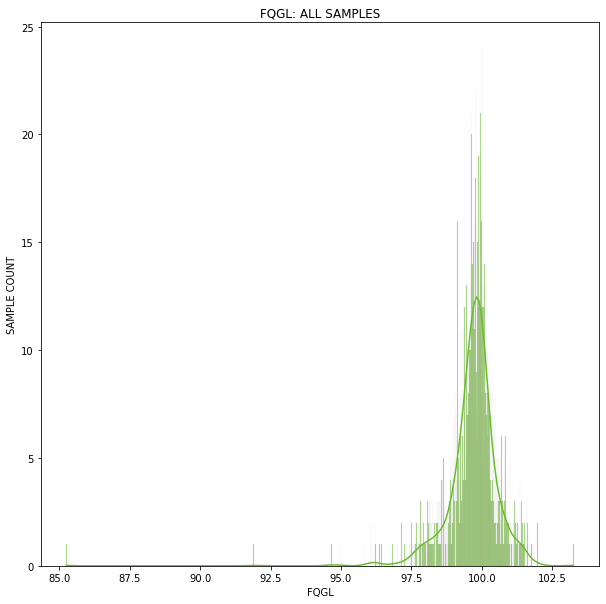

In [300]:
# fechamentos químicos
v = 'FQGL'

fig, ax = plt.subplots(figsize=chart_size)
sea.histplot(data=process_df[v],binwidth=0.01,kde=True, color=valecolor['VERDE2'])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SAMPLE COUNT')
ax.set_title(v + ': ALL SAMPLES')

plt.show()
fig.savefig(proj + '_HISTOGRAM_'+ v +'.jpeg', transparent=None)

In [301]:
#FECHAMENTO GLOBAIS -  6 AMOSTRAS FORA DO CORREDOR
#A LISTA ERA PRA SER MAIOR... MAS AMOSTRAS COM 6 OU MENOS VALORES FORAM ANULADAS POR HETEROTOPIA EM PASSOS ANTERIORES
#MESMO ASSIM A FUNÇÃO DE FECHAMENTO NÃO ERA A MELHOR PARA AMOSTRAS (MÁFICAS)


di=(process_df['FQGL'] < 95) | (process_df['FQGL'] > 102)
process_df.loc[di,'FLAG_FQGL'] = 'X'


add_to_fac(process_df[di],'95_FQGL_102')
summary=add_to_summary(process_df, process_df, '95_FQGL_102', 'FQGL FORA DO CORREDOR', 'VALORES ANULADOS', summary)

process_df = cleanup_gl_grq(process_df, di)

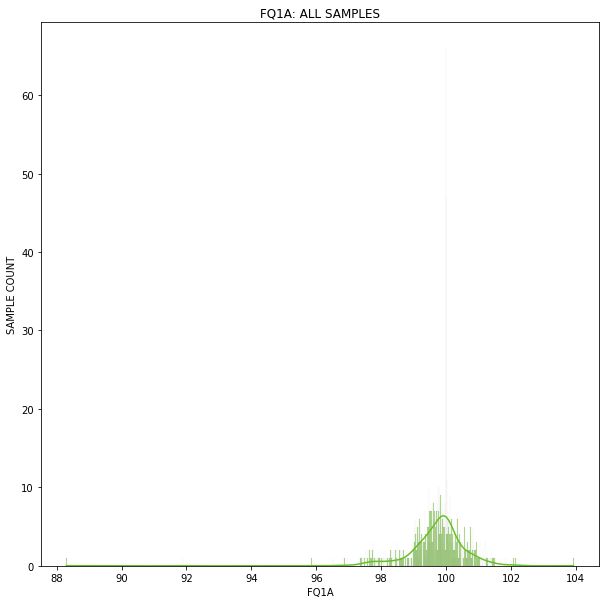

In [302]:
# fechamentos químicos 1a
v = 'FQ1A'

fig, ax = plt.subplots(figsize=chart_size)
sea.histplot(data=process_df[v],binwidth=0.01,kde=True, color=valecolor['VERDE2'])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SAMPLE COUNT')
ax.set_title(v + ': ALL SAMPLES')

plt.show()
fig.savefig(proj + '_HISTOGRAM_'+ v +'.jpeg', transparent=None)

In [303]:
min=93
max=105
var='FQ1A'
di=(process_df[var] < min) | (process_df[var] > max)
process_df.loc[di,'FLAG_' + var] = 'X'


add_to_fac(process_df[di],str(min)+'_'+var+'_' + str(max))
summary=add_to_summary(process_df, process_df, str(min)+'_'+var+'_' + str(max), var+' FORA DO CORREDOR', 'VALORES ANULADOS', summary)

process_df = cleanup_gl_grq(process_df, di)

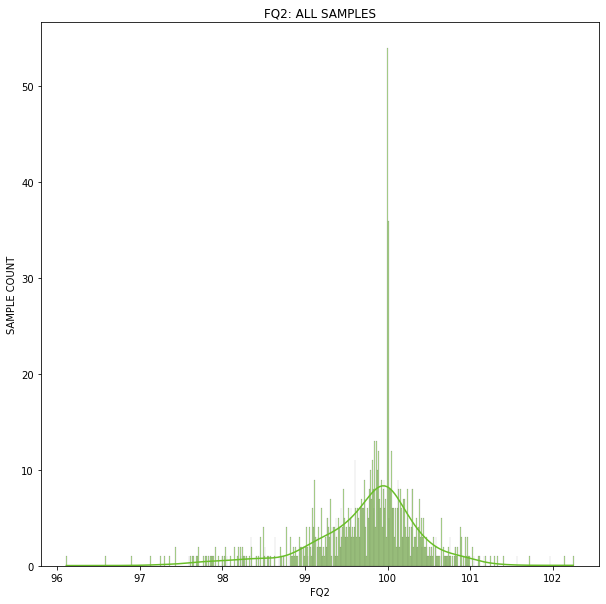

In [304]:
# fechamentos químicos 2
v = 'FQ2'

fig, ax = plt.subplots(figsize=chart_size)
sea.histplot(data=process_df[v],binwidth=0.01,kde=True, color=valecolor['VERDE2'])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SAMPLE COUNT')
ax.set_title(v + ': ALL SAMPLES')

plt.show()
fig.savefig(proj + '_HISTOGRAM_'+ v +'.jpeg', transparent=None)

In [305]:
#disparar opcional... 0 amostras
min=93
max=105
var='FQ2'
di=(process_df[var] < min) | (process_df[var] > max)
process_df.loc[di,'FLAG_' + var] = 'X'


add_to_fac(process_df[di],str(min)+'_'+var+'_' + str(max))
summary=add_to_summary(process_df, process_df, str(min)+'_'+var+'_' + str(max), var+' FORA DO CORREDOR', 'VALORES ANULADOS', summary)

process_df = cleanup_gl_grq(process_df, di)

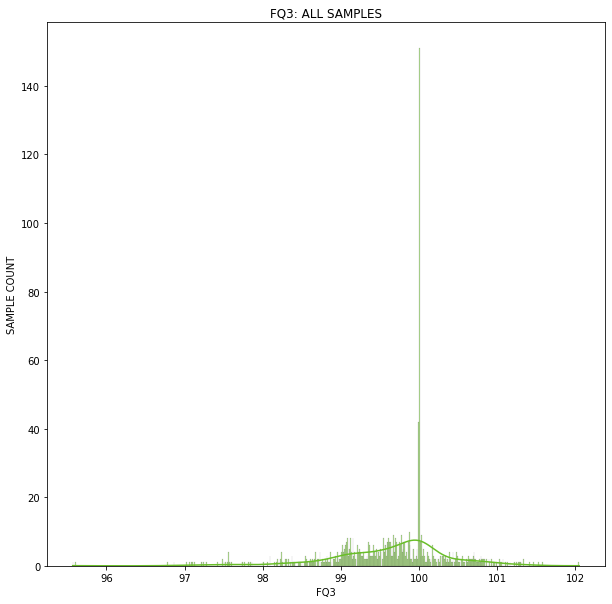

In [306]:
#disparar opcional... 0 amostras
# fechamentos químicos 3
v = 'FQ3'

fig, ax = plt.subplots(figsize=chart_size)
sea.histplot(data=process_df[v],binwidth=0.01,kde=True, color=valecolor['VERDE2'])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SAMPLE COUNT')
ax.set_title(v + ': ALL SAMPLES')

plt.show()
fig.savefig(proj + '_HISTOGRAM_'+ v +'.jpeg', transparent=None)

In [307]:
min=93
max=105
var='FQ3'
di=(process_df[var] < min) | (process_df[var] > max)
process_df.loc[di,'FLAG_' + var] = 'X'

add_to_fac(process_df[di],str(min)+'_'+var+'_' + str(max))
summary=add_to_summary(process_df, process_df, str(min)+'_'+var+'_' + str(max), var+' FORA DO CORREDOR', 'VALORES ANULADOS', summary)

process_df = cleanup_gl_grq(process_df, di)

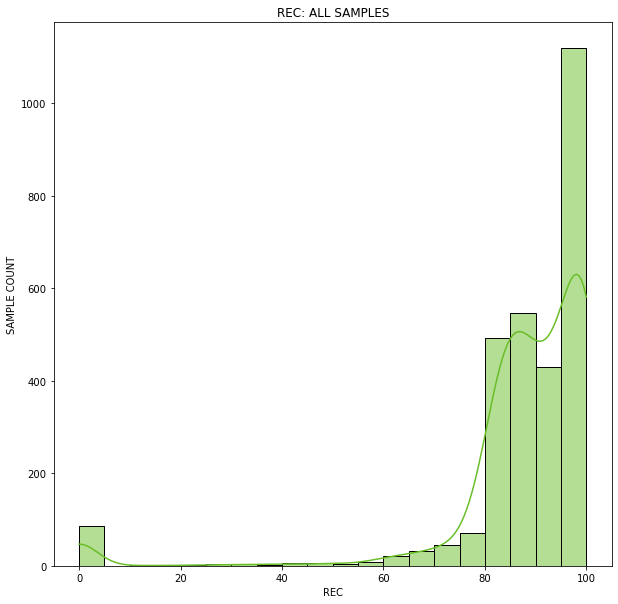

In [308]:

# recuperação
v = 'REC'

fig, ax = plt.subplots(figsize=chart_size)
sea.histplot(data=process_df[v],binwidth=5,kde=True, color=valecolor['VERDE2'])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('SAMPLE COUNT')
ax.set_title(v + ': ALL SAMPLES')

plt.show()
fig.savefig(proj + '_HISTOGRAM_'+ v +'.jpeg', transparent=None)

In [309]:
min=60
var='REC'
di=process_df[var] < min
process_df.loc[di,'FLAG_' + var] = 'X'

add_to_fac(process_df[di],var+'_LT_' + str(min))
summary=add_to_summary(process_df, process_df, var + '_LT_'+ str(min), var+' ABAIXO DE'+ str(min), 'VALORES ANULADOS', summary)

process_df = cleanup_gl_grq(process_df, di)

In [310]:
#qaqc: 10 amostras avaliadas e anuladas
di=process_df['FLAG_QAQC'] == 'X'

add_to_fac(process_df[di],'QAQC')
summary=add_to_summary(df_in, df_out, 'QAQC', var+' ABAIXO DE'+ str(min), 'VALORES ANULADOS', summary)

process_df = cleanup_gl_grq(process_df, di)

In [311]:
add_to_fac(process_df,'FINAL')

In [312]:
add_to_fac(summary,'PROCEDIMENTOS2')

In [313]:
#summary.drop([0,1,2,3,4,5,6,7,8], inplace=True)
summary

,SHEET,DESC,NSAMP_INICIAL,NSAMP_FINAL,DIFF_N,DIFF_N_PERC,METRAGEM_INICIAL,METRAGEM_FINAL,DIFF_M,DIFF_M_PERC,OBS
0,RAW,dados iniciais do fso,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,inicial data
1,FEGL_DEFINED,AMOSTRAS COM TEOR DE FERRO DEFINIDO,3091,1792,-1299,-0.420252,46521.8,13607.33,-32914.47,-0.707506,
2,GLOBAL_INCOMPLETA,GL COM APENAS 4 VALORES,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,26 AMOSTRAS ANULADAS
3,MEDIAS APLICADAS,GL COM APENAS 6 VALORES,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,MENORES: VALORES TRATADOS PROXIMOS A RESIDUAL
4,PFGL_AUSENTE,PFGL AUSENTE,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,100 - FECHAMENTO PACIAL ~ 4.3056
5,PF1B_NEGATIVA,PF NEGATIVA,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,LD=0.01
6,G1A_LT1,G1A MENOR QUE 1%,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,PASSADOS PARA G1B E MEDIAS RECALCULADAS
7,G3_LT1,G3 MENOR QUE 1%,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,PASSADOS PARA G2 E MEDIAS RECALCULADAS
8,95_FQGL_102,FQGL FORA DO CORREDOR,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,VALORES ANULADOS
9,93_FQ1A_105,FQ1A FORA DO CORREDOR,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,VALORES ANULADOS


In [314]:
summary

,SHEET,DESC,NSAMP_INICIAL,NSAMP_FINAL,DIFF_N,DIFF_N_PERC,METRAGEM_INICIAL,METRAGEM_FINAL,DIFF_M,DIFF_M_PERC,OBS
0,RAW,dados iniciais do fso,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,inicial data
1,FEGL_DEFINED,AMOSTRAS COM TEOR DE FERRO DEFINIDO,3091,1792,-1299,-0.420252,46521.8,13607.33,-32914.47,-0.707506,
2,GLOBAL_INCOMPLETA,GL COM APENAS 4 VALORES,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,26 AMOSTRAS ANULADAS
3,MEDIAS APLICADAS,GL COM APENAS 6 VALORES,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,MENORES: VALORES TRATADOS PROXIMOS A RESIDUAL
4,PFGL_AUSENTE,PFGL AUSENTE,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,100 - FECHAMENTO PACIAL ~ 4.3056
5,PF1B_NEGATIVA,PF NEGATIVA,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,LD=0.01
6,G1A_LT1,G1A MENOR QUE 1%,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,PASSADOS PARA G1B E MEDIAS RECALCULADAS
7,G3_LT1,G3 MENOR QUE 1%,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,PASSADOS PARA G2 E MEDIAS RECALCULADAS
8,95_FQGL_102,FQGL FORA DO CORREDOR,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,VALORES ANULADOS
9,93_FQ1A_105,FQ1A FORA DO CORREDOR,3091,3091,0,0.000000,46521.8,46521.80,0.00,0.000000,VALORES ANULADOS


In [315]:
import pygslib as gsl

In [316]:
gsl.

SyntaxError: invalid syntax (Temp/ipykernel_8972/4109925050.py, line 1)

In [ ]:
#TESTE...

In [ ]:
df = pd.DataFrame({'c1': list('abcdefg')})
df.loc[5, 'c1'] = np.nan

In [ ]:
df